In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt  # Gives access to basic plotting functions
from natsort import natsorted
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

from matplotlib.ticker import ScalarFormatter
import pandas as pd
import matplotlib.tri as mtri
import csv

In [29]:
folder_path_exp = ['../../data/experimental_concentration_data']
paths_matrices = natsorted(os.listdir(folder_path_exp[0]))
time_values = [int(name.split('_')[-1].replace('.npy', '')) for name in paths_matrices]

In [30]:
mean_fluxes = []
error_of_mean = []
time_for_xAxis = []

for idx, path in enumerate(paths_matrices):

    temp = np.load(os.path.join(os.getcwd(), folder_path_exp[0], path))
    concentration_matrix = temp
    nan_rows = np.isnan(concentration_matrix).all(axis=1)
    concentration_matrix = concentration_matrix[~nan_rows]
    #print(filtered_arr)
    # Iterate over the rows and copy values from the row before NaN row
    for i in range(0, concentration_matrix.shape[0]):
        if np.isnan(concentration_matrix[i]).any():
            concentration_matrix[i] = concentration_matrix[i-1]
    print("concentration_matrix: " + str(concentration_matrix.shape))
    print(np.max(concentration_matrix))
    concentration_matrix = np.flipud(concentration_matrix)
    #masked_conc = np.ma.masked_where(np.flipud(mask) == 0, concentration_matrix)
    masked_conc = concentration_matrix
    print (masked_conc.shape)
    grad_y, grad_x = np.gradient(masked_conc, 5.5E-6,5.5E-06)
    grad_y = grad_y * (-1) * 1.32E-5
    grad_x = grad_x * (-1) * 1.32E-5
    horizontal_start = 818
    horizontal_end = 1364
    list_of_fluxes = []
    integral_lines = np.zeros_like(masked_conc)
    for pixels_above_edge in np.linspace(0.02E-3 / 5.5E-6, 1E-3 / 5.5E-6, 60, dtype=int):

        vertical_row =  pixels_above_edge #substrate_position +

        flux1 = np.trapz(grad_y[vertical_row, horizontal_start - pixels_above_edge:horizontal_end + pixels_above_edge],
                        dx=5.5E-6)
        
        flux2 = np.trapz(grad_x[0:vertical_row, horizontal_start - pixels_above_edge], dx=5.5E-6)
       
        flux3 = np.trapz(grad_x[0:vertical_row, horizontal_end + pixels_above_edge], dx=5.5E-6)
        
        total_flux = flux1 + (flux3 - flux2)
        
        print('The overall diffusive flux along pixel_y for ' + str(idx) + ' =' + str(pixels_above_edge) + ' is  ' + str(total_flux))
    
        list_of_fluxes.append(total_flux)
        integral_lines[vertical_row, horizontal_start - pixels_above_edge:horizontal_end + pixels_above_edge] = 1
        integral_lines[0:vertical_row, horizontal_start - pixels_above_edge] = 1
        integral_lines[0:vertical_row, horizontal_end + pixels_above_edge] = 1

    mean_fluxes.append(np.mean(list_of_fluxes))
    print('The mean flux is ' + str(np.mean(list_of_fluxes)))
    error_of_mean.append(np.std(list_of_fluxes, ddof=1, keepdims=True) / (np.size(list_of_fluxes)) ** 0.5)
    print('The sample standard error of mean is ' + str(np.std(list_of_fluxes, ddof=1) / (np.size(list_of_fluxes)) ** 0.5))
    x_axis_time = np.round((time_values[idx]-1)*0.4, 1)
    time_for_xAxis.append(x_axis_time)
    #ax2.scatter(x_axis_time, mean_fluxes[idx],s=3)#, label='{} s'.format(np.round((time_values[idx]-1)*0.4, 1)))
    #ax2.errorbar(x_axis_time, mean_fluxes[idx], yerr=error_of_mean[idx]) #fmt='o', capsize=5,



concentration_matrix: (1923, 2000)
0.9800736881862425
(1923, 2000)
The overall diffusive flux along pixel_y for 0 =3 is  8.318736211428717e-08
The overall diffusive flux along pixel_y for 0 =6 is  2.0870322530007906e-07
The overall diffusive flux along pixel_y for 0 =9 is  3.3477081389449047e-07
The overall diffusive flux along pixel_y for 0 =12 is  8.850520163705664e-06
The overall diffusive flux along pixel_y for 0 =15 is  9.057747012503595e-06
The overall diffusive flux along pixel_y for 0 =18 is  9.379253324212708e-06
The overall diffusive flux along pixel_y for 0 =21 is  9.7944483640504e-06
The overall diffusive flux along pixel_y for 0 =24 is  1.0272662026729148e-05
The overall diffusive flux along pixel_y for 0 =27 is  1.0744257175661505e-05
The overall diffusive flux along pixel_y for 0 =30 is  1.1292867880507484e-05
The overall diffusive flux along pixel_y for 0 =33 is  1.1783130548113439e-05
The overall diffusive flux along pixel_y for 0 =36 is  1.2245304510709134e-05
The ove

# Figure 9

/media/ssd-daten/speciesBoussinesqPimpleFoam/cases/notebooks/../convergence_study/mesh1//flux_drop.csv
0


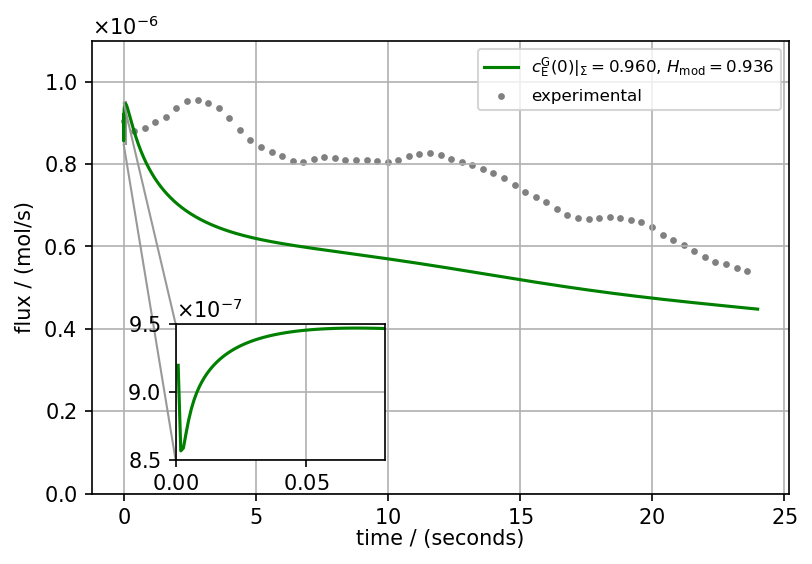

Done


In [54]:
fig, ax = plt.subplots(1,1,dpi =150)
axs = [ax]

flux_in_mol_s = [i * 0.060 for i in mean_fluxes]
axs[0].scatter(time_for_xAxis, flux_in_mol_s,s=5, color='grey',label='experimental')

target_numbers = ['../convergence_study/mesh1/']  
H_values = ['$H_{\mathrm{mod}} = 0.936$']
c_init = ['$c_{\mathrm{E}}^{\mathrm{G}}(0)|_{\Sigma}=0.960$']

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, -5)) 

# Initialize empty lists to store data from the two columns
time = []
conc = []
moles = []
flux = []
counter = 1

# Create a list of colors for the plots
colors = ["g"]

# Parent folder where the data is located
parent_folder = os.getcwd()

# Loop through the target numbers and iterate over the time_range
for target_number in target_numbers:
    folder_name = f'{target_number}/'
    folder_path = os.path.join(parent_folder, folder_name)
    #print(folder_path)
    filename = os.path.join(folder_path, f'flux_drop.csv')
    print(filename)
    # Read the CSV file into a DataFrame 
    df = pd.read_csv(filename, delimiter=', ', engine='python')
    simFlux = df['flux (mol/ms)']
    time = df['t(in s)']
    #flux = df['flux (mol/ms)']
    print(counter-1)
    # Ensure counter stays within bounds
    flux_in_mol_s_sim = [i * 0.060 for i in simFlux]
    if counter-1 < len(H_values) and counter-1 < len(c_init):
        string1 = H_values[counter-1]
        string2 = c_init[counter-1]
        plt2 = axs[0].plot(time[:24000], flux_in_mol_s_sim[:24000], marker='', linestyle='-', linewidth=1.5, color=colors[counter-1], label=f'{string2}, {string1}')
    counter += 1

# Create an inset axis
inset_ax = axs[0].inset_axes([0.12, 0.075, 0.3, 0.3])
inset_ax.plot(time[:24000], flux_in_mol_s_sim[:24000], marker='', ls='-', color='green')
inset_ax.set_xlim(0, 0.080)
inset_ax.set_ylim(0.850E-06, 0.95E-06)
inset_ax.grid()
inset_ax.yaxis.tick_left()
inset_ax.xaxis.set_major_formatter(formatter)
inset_ax.yaxis.set_major_formatter(formatter)
# Mark the inset area on the main plot
mark_inset(axs[0], inset_ax, loc1=2, loc2=3, fc="none", ec="0.6")

axs[0].xaxis.set_major_formatter(formatter)
axs[0].yaxis.set_major_formatter(formatter)
axs[0].set_xlabel(xlabel="time / (seconds)", labelpad=0.4)
axs[0].set(ylabel='flux / (mol/s)')
axs[0].legend(loc='upper right',prop={'size': 8},ncol=1)#(, bbox_to_anchor=(0.5, -0.2), ) #loc=2, prop={'size': 7}
axs[0].grid()#(b=None, which='major', axis='both', linestyle='dotted', lw=0.5)
axs[0].set_ylim(0.0,1.1E-06)
#axs[0].set_title('9 wt. $\%$ ethanol loss')
fig.savefig('../figures/9Loss_flux_0.960C.pdf', bbox_inches='tight', dpi=600)
#fig2.savefig('N_All_Profiles.pgf', bbox_inches='tight', dpi=600)
plt.show()
print('Done')


# Figure 11

/media/ssd-daten/speciesBoussinesqPimpleFoam/cases/notebooks/../vary_initial_concentrations/0.950C/flux_drop.csv
0
/media/ssd-daten/speciesBoussinesqPimpleFoam/cases/notebooks/../convergence_study/mesh1//flux_drop.csv
1
/media/ssd-daten/speciesBoussinesqPimpleFoam/cases/notebooks/../vary_initial_concentrations/0.980C//flux_drop.csv
2


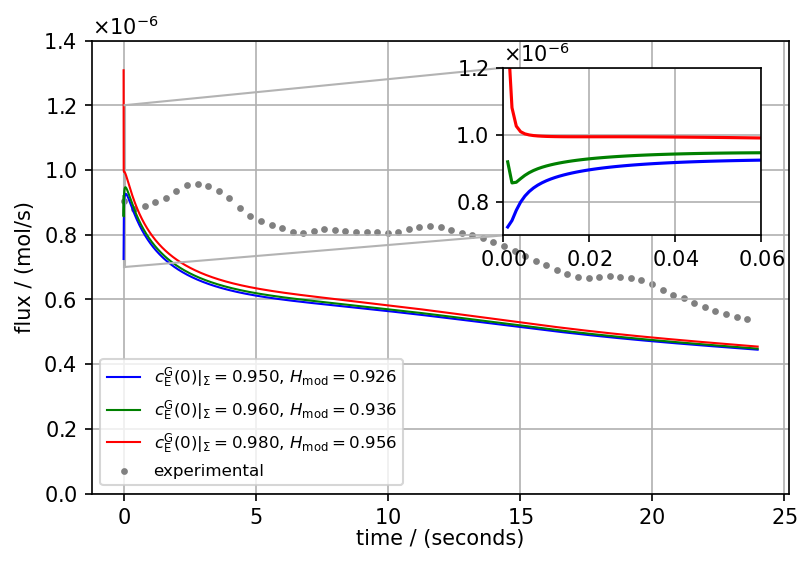

Done


In [59]:
fig, ax = plt.subplots(1,1,dpi =150)
axs = [ax]

flux_in_mol_s = [i * 0.060 for i in mean_fluxes]
axs[0].scatter(time_for_xAxis, flux_in_mol_s,s=5, color='grey',label='experimental')

target_numbers = ['../vary_initial_concentrations/0.950C','../convergence_study/mesh1/', '../vary_initial_concentrations/0.980C/' ]
H_values = ['$H_{\mathrm{mod}} = 0.926$','$H_{\mathrm{mod}} = 0.936$','$H_{\mathrm{mod}} = 0.956$']
c_init = ['$c_{\mathrm{E}}^{\mathrm{G}}(0)|_{\Sigma}=0.950$','$c_{\mathrm{E}}^{\mathrm{G}}(0)|_{\Sigma}=0.960$','$c_{\mathrm{E}}^{\mathrm{G}}(0)|_{\Sigma}=0.980$']

# Initialize empty lists to store data from the two columns
time = []
conc = []
moles = []
flux = []
counter = 1

# Create a list of colors for the plots
colors = ["b", "g", "r","magenta","purple"]

# Create an inset axis
inset_ax = axs[0].inset_axes([0.59, 0.57, 0.37, 0.37])

# Parent folder where the data is located
parent_folder = os.getcwd()

# Loop through the target numbers and iterate over the time_range
for target_number in target_numbers:
    folder_name = f'{target_number}/'
    folder_path = os.path.join(parent_folder, folder_name)
    #print(folder_path)
    filename = os.path.join(folder_path, f'flux_drop.csv')
    print(filename)
    # Read the CSV file into a DataFrame 
    df = pd.read_csv(filename, delimiter=', ', engine='python')
    simFlux = df['flux (mol/ms)']
    time = df['t(in s)']
    #flux = df['flux (mol/ms)']
    print(counter-1)
    # Ensure counter stays within bounds
    flux_in_mol_s_sim = [i * 0.060 for i in simFlux]
    if counter-1 < len(H_values) and counter-1 < len(c_init):
        string1 = H_values[counter-1]
        string2 = c_init[counter-1]
        plt2 = axs[0].plot(time[:24000], flux_in_mol_s_sim[:24000], marker='', linestyle='-', linewidth=1, color=colors[counter-1], label=f'{string2}, {string1}')
        inset_ax.plot(time[:24000], flux_in_mol_s_sim[:24000], marker='', ls='-', color=colors[counter-1])
    counter += 1


inset_ax.set_xlim(0, 0.060)
inset_ax.set_ylim(0.70E-06, 1.2E-06)
inset_ax.grid()
inset_ax.yaxis.tick_left()
inset_ax.xaxis.set_major_formatter(formatter)
inset_ax.yaxis.set_major_formatter(formatter)
# Mark the inset area on the main plot
mark_inset(axs[0], inset_ax, loc1=2, loc2=3, fc="none", ec="0.7")

axs[0].xaxis.set_major_formatter(formatter)
axs[0].yaxis.set_major_formatter(formatter)
axs[0].set_xlabel(xlabel="time / (seconds)", labelpad=0.4)
axs[0].set(ylabel='flux / (mol/s)')
axs[0].legend(loc='lower left',prop={'size': 8},ncol=1)#(, bbox_to_anchor=(0.5, -0.2), ) #loc=2, prop={'size': 7}
axs[0].grid()#(b=None, which='major', axis='both', linestyle='dotted', lw=0.5)
axs[0].set_ylim(0.0,1.4E-06)
#axs[0].set_title('9 wt. $\%$ ethanol loss')
fig.savefig('../figures/9Loss_flux_sim_exp.pdf', bbox_inches='tight', dpi=600)
#fig2.savefig('N_All_Profiles.pgf', bbox_inches='tight', dpi=600)
plt.show()
print('Done')
